# ANIME RECOMMENDER SYSTEM

### What is Recommendation System?

- A recommendation system is a subclass of Information filtering Systems that seeks to predict the rating or the preference a user might give to an item. In simple words, it is an algorithm that suggests relevant items to users. Eg: In the case of Netflix which movie to watch, In the case of e-commerce which product to buy, or In the case of kindle which book to read, etc.

In [1]:
## Importing Necessary Libraries
import  pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Reading the dataset
ratings = pd.read_csv("anime.csv",nrows=500000)
anime= pd.read_csv("animelist.csv", nrows=500000)
pd.options.display.max_columns

20

In [3]:
ratings.head()

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,...,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,...,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,...,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,...,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,...,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0


In [4]:
anime.head()

,user_id,anime_id,rating,watching_status,watched_episodes
0,0,67,9,1,1
1,0,6702,7,1,4
2,0,242,10,1,4
3,0,4898,0,1,1
4,0,21,10,1,0


In [5]:
print(ratings.columns)
ratings.rename({"MAL_ID":"anime_id"},axis=1, inplace=True)
anime.rename({"anime_id":"Name"},axis=1, inplace=True)

Index(['MAL_ID', 'Name', 'Score', 'Genres', 'English name', 'Japanese name',
       'Type', 'Episodes', 'Aired', 'Premiered', 'Producers', 'Licensors',
       'Studios', 'Source', 'Duration', 'Rating', 'Ranked', 'Popularity',
       'Members', 'Favorites', 'Watching', 'Completed', 'On-Hold', 'Dropped',
       'Plan to Watch', 'Score-10', 'Score-9', 'Score-8', 'Score-7', 'Score-6',
       'Score-5', 'Score-4', 'Score-3', 'Score-2', 'Score-1'],
      dtype='object')


In [6]:
anime.rename({"Name":"anime_id"},axis=1, inplace=True)

##### Due to limitation of the pc power, I am going to do recommendation on 10000 animes.

## Exploratory Data Analysis

### Merging the dataset

In [7]:
df_rating= ratings.merge(anime, how="left", left_on="anime_id", right_on="anime_id")

In [8]:
df_rating.head()

,anime_id,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1,user_id,rating,watching_status,watched_episodes
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,...,20688.0,8904.0,3184.0,1357.0,741.0,1580.0,3.0,9.0,2.0,26.0
1,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,...,20688.0,8904.0,3184.0,1357.0,741.0,1580.0,6.0,6.0,2.0,26.0
2,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,...,20688.0,8904.0,3184.0,1357.0,741.0,1580.0,8.0,0.0,3.0,6.0
3,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,...,20688.0,8904.0,3184.0,1357.0,741.0,1580.0,13.0,0.0,6.0,0.0
4,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,...,20688.0,8904.0,3184.0,1357.0,741.0,1580.0,14.0,9.0,2.0,13.0


### Handling Missing Values

In [9]:
df_rating.isnull().sum()

anime_id               0
Name                   0
Score                  0
Genres                 0
English name           0
Japanese name          0
Type                   0
Episodes               0
Aired                  0
Premiered              0
Producers              0
Licensors              0
Studios                0
Source                 0
Duration               0
Rating                 0
Ranked                 0
Popularity             0
Members                0
Favorites              0
Watching               0
Completed              0
On-Hold                0
Dropped                0
Plan to Watch          0
Score-10               0
Score-9                0
Score-8                0
Score-7                0
Score-6                0
Score-5                0
Score-4                0
Score-3                0
Score-2                0
Score-1                0
user_id             4771
rating              4771
watching_status     4771
watched_episodes    4771
dtype: int64

In [10]:
#there are more than 10000 null values created due to merging so going to remove them, because we don't have any data for the user _id,
df_rating.dropna(inplace=True)

In [11]:
df_rating.describe(include="all")

,anime_id,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1,user_id,rating,watching_status,watched_episodes
count,500000.000000,500000,500000,500000,500000,500000,500000,500000,500000,500000,...,500000,500000,500000,500000,500000,500000,500000.000000,500000.000000,500000.000000,500000.000000
unique,NaN,12788,533,4499,5735,12133,7,177,9318,226,...,4236,3288,2235,1506,1110,1084,NaN,NaN,NaN,NaN
top,NaN,Death Note,Unknown,Hentai,Unknown,僕のヒーローアカデミア,TV,12,"Jan 10, 2012 to Mar 27, 2012",Unknown,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,NaN,NaN,NaN,NaN
freq,NaN,1119,4888,5897,102058,2203,348735,137210,1500,152452,...,3232,3485,3628,3720,3845,3201,NaN,NaN,NaN,NaN
mean,16597.634468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,812.218214,4.253330,3.092966,11.807390
std,13806.156577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,457.729363,3.902195,1.786781,68.563941
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,0.000000
25%,3297.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,428.000000,0.000000,2.000000,0.000000
50%,12679.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,815.000000,5.000000,2.000000,3.000000
75%,31043.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1205.000000,8.000000,6.000000,12.000000


#### I am going to consider the anime which has more than 300 upvotes and only if a  user has given in-total more than 300 votes to the particular anime.

In [12]:
anime_count= df_rating['anime_id'].value_counts(ascending=True)
user_count= df_rating["user_id"].value_counts(ascending=True)
anime_count.index

Int64Index([10116, 29383,  6797, 41181, 37532, 28235, 33438,  9098,  3875,
            36183,
            ...
            10620,    20,  6547,  9253,  4224,  1575,  5114, 11757, 16498,
             1535],
           dtype='int64', length=12791)

In [13]:
rating_df= df_rating[df_rating["anime_id"].isin(anime_count[anime_count>=300].index)].copy()

In [14]:
rating_df.shape

(148429, 39)

#### Now I am going to remove the column which is not necessary for the recommendation

In [15]:
df= rating_df[["user_id", "anime_id","Name","rating","Genres","watching_status","watched_episodes"]]

In [16]:
df.head()

,user_id,anime_id,Name,rating,Genres,watching_status,watched_episodes
0,3.0,1,Cowboy Bebop,9.0,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",2.0,26.0
1,6.0,1,Cowboy Bebop,6.0,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",2.0,26.0
2,8.0,1,Cowboy Bebop,0.0,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",3.0,6.0
3,13.0,1,Cowboy Bebop,0.0,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",6.0,0.0
4,14.0,1,Cowboy Bebop,9.0,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",2.0,13.0


### Checking for Datatypes


In [17]:
df.info()  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148429 entries, 0 to 495598
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   user_id           148429 non-null  float64
 1   anime_id          148429 non-null  int64  
 2   Name              148429 non-null  object 
 3   rating            148429 non-null  float64
 4   Genres            148429 non-null  object 
 5   watching_status   148429 non-null  float64
 6   watched_episodes  148429 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 9.1+ MB


#All the columns has correct datatypes

#### I am going to grouped the dataset by name and ratings where we are more interested.


In [18]:
df.head()

,user_id,anime_id,Name,rating,Genres,watching_status,watched_episodes
0,3.0,1,Cowboy Bebop,9.0,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",2.0,26.0
1,6.0,1,Cowboy Bebop,6.0,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",2.0,26.0
2,8.0,1,Cowboy Bebop,0.0,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",3.0,6.0
3,13.0,1,Cowboy Bebop,0.0,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",6.0,0.0
4,14.0,1,Cowboy Bebop,9.0,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",2.0,13.0


In [19]:
anime_rating= df.groupby(by="Name")["rating"].count()
anime_rating.head(50)
anime_rating= anime_rating.reset_index()[["Name","rating"]]

In [20]:
anime_rating.head()

,Name,rating
0,3-gatsu no Lion,348
1,91 Days,308
2,Accel World,444
3,Air,305
4,Ajin,307


##### Now I am going to merge the 2 table(anime_rating, df), so that we will only get anime which has higher rating as specified earlier.

In [21]:
main_df= df.merge(anime_rating, how="left", left_on="Name", right_on="Name")
main_df.head()

,user_id,anime_id,Name,rating_x,Genres,watching_status,watched_episodes,rating_y
0,3.0,1,Cowboy Bebop,9.0,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",2.0,26.0,672
1,6.0,1,Cowboy Bebop,6.0,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",2.0,26.0,672
2,8.0,1,Cowboy Bebop,0.0,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",3.0,6.0,672
3,13.0,1,Cowboy Bebop,0.0,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",6.0,0.0,672
4,14.0,1,Cowboy Bebop,9.0,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",2.0,13.0,672


#### since rating_x is our previous rating which had low rating as well, so going to drop the rating_x and rename the rating_y as rating


In [22]:
main_df.drop("rating_x", axis=1, inplace=True)

In [23]:
main_df.rename({"rating_y":"rating"},axis=1,inplace=True)
main_df.head()

,user_id,anime_id,Name,Genres,watching_status,watched_episodes,rating
0,3.0,1,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",2.0,26.0,672
1,6.0,1,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",2.0,26.0,672
2,8.0,1,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",3.0,6.0,672
3,13.0,1,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",6.0,0.0,672
4,14.0,1,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",2.0,13.0,672


## Feature Engineering

### Converting categorical variable

In [29]:
from sklearn.preprocessing import LabelEncoder
anime_ids= LabelEncoder().fit_transform(main_df["anime_id"])
user_ids= LabelEncoder().fit_transform(main_df["user_id"])
main_df["anime"]= pd.DataFrame(anime_ids, columns= ["anime"])
main_df["user"]= pd.DataFrame(user_ids, columns=["user"])

In [30]:
print("Num of users: {}, Num of animes: {}".format(len(user_ids), len(anime_ids)))
print("Min total rating: {}, Max total rating: {}".format(min(main_df['rating']), max(main_df['rating'])))

Num of users: 148429, Num of animes: 148429
Min total rating: 300, Max total rating: 1119


In [31]:
main_df.groupby(by="user_id")["rating"].count()

user_id
0.0        28
1.0        78
2.0       103
3.0       156
4.0        36
         ... 
1623.0      1
1624.0     22
1625.0     73
1626.0    122
1627.0    101
Name: rating, Length: 1478, dtype: int64

In [32]:
pivot= main_df.pivot_table(values= "rating", index= "user_id", columns="anime_id", aggfunc=np.sum).fillna(0)
pivot

anime_id,1,6,19,20,21,24,30,32,33,43,...,37779,37999,38000,38408,38524,38671,38691,39587,40028,40748
user_id,,,,,,,,,,,,,,,,,,,,,
0.0,0.0,0.0,434.0,845.0,651.0,305.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.0,0.0,0.0,434.0,845.0,651.0,0.0,0.0,0.0,0.0,0.0,...,442.0,427.0,534.0,359.0,0.0,328.0,397.0,342.0,308.0,316.0
2.0,0.0,0.0,434.0,845.0,651.0,305.0,0.0,0.0,0.0,0.0,...,442.0,0.0,534.0,359.0,408.0,328.0,397.0,0.0,0.0,316.0
3.0,672.0,0.0,0.0,0.0,0.0,0.0,694.0,0.0,0.0,384.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1623.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1624.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1625.0,0.0,0.0,0.0,0.0,651.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [112]:
#### We will create a pivot table based on name and user_id 
pivot_name= df.pivot_table(values="rating", index="Name", columns="user_id").fillna(0)
pivot_name.head()

user_id,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,1617.0,1618.0,1619.0,1620.0,1621.0,1623.0,1624.0,1625.0,1626.0,1627.0
Name,,,,,,,,,,,,,,,,,,,,,
3-gatsu no Lion,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0
91 Days,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
Accel World,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,...,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,7.0,8.0
Air,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,8.0,6.0,0.0,0.0,0.0,0.0,0.0
Ajin,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0


## Model Creation

### Implementing KNN (K-Nearest Neighbours)- Cosine Similarity

####  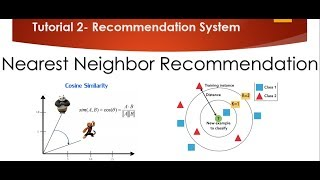

#### Implementation of KNN
- We convert out table into 2 dimension matric using pca(principal component analysis) and thus fill the null values with 0 because here we are calculating the distance between the vector.Then we will transform the rating into into sparce matric for the ease of calculation.

In [35]:
from scipy.sparse import csr_matrix
pivot_name_matrix= csr_matrix(pivot_name.values)

In [43]:
print(pivot_name_matrix.toarray())
pivot_name_matrix.shape

[[0. 0. 0. ... 0. 0. 7.]
 [0. 0. 0. ... 0. 0. 8.]
 [0. 0. 0. ... 0. 7. 8.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 9.]
 [0. 0. 0. ... 0. 0. 0.]]


(321, 1478)

In [61]:
from sklearn.neighbors import NearestNeighbors
model= NearestNeighbors(metric="cosine", algorithm="brute" )
knn_model= model.fit(pivot_name_matrix)

In [54]:
pivot_name_matrix.shape[0]  #all the indexes, bcz all the indexes contain anime's name

321

#### lets verify for a new movie, if our dataset will be able to recommend properly or not.

In [110]:
import numpy as np
query_index= np.random.choice(pivot_name_matrix.shape[0]) ##picking up any random animes from pivot matrix
print(query_index)

174


In [115]:
distances, indices = knn_model.kneighbors(pivot_name.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 6)

In [118]:
pivot_name.head()

user_id,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,1617.0,1618.0,1619.0,1620.0,1621.0,1623.0,1624.0,1625.0,1626.0,1627.0
Name,,,,,,,,,,,,,,,,,,,,,
3-gatsu no Lion,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0
91 Days,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
Accel World,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,...,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,7.0,8.0
Air,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,8.0,6.0,0.0,0.0,0.0,0.0,0.0
Ajin,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0


In [125]:
distances.flatten()

array([0.        , 0.51457657, 0.51803208, 0.53004347, 0.54388785,
       0.54871466])

In [126]:
indices.flatten()  #to get the movies name from index

array([176, 104, 174, 165,  39, 245], dtype=int64)

In [129]:
for i in range(0, len(distances.flatten())):
    if i==0:
        print("Recommendation for Anime  -- {0}:\n".format(pivot_name.index[query_index]))
    else:
        print("{0}: {1}, with a distance of {2}:".format(i, pivot_name.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendation for Anime  -- Maoyuu Maou Yuusha:

1: Hataraku Maou-sama!, with a distance of 0.514576573229095:
2: Mahouka Koukou no Rettousei, with a distance of 0.5180320801367064:
3: Log Horizon, with a distance of 0.5300434696193272:
4: Boku wa Tomodachi ga Sukunai, with a distance of 0.5438878525670714:
5: Sankarea, with a distance of 0.5487146557906732:
